In [3]:
import pandas as pd

# Read each sheet into a separate DataFrame
sheet1 = pd.read_excel('Grupo_5.xlsx', sheet_name=0)
sheet2 = pd.read_excel('Grupo_5.xlsx', sheet_name=1)

# Add an identifier column to each DataFrame
sheet1['sheet_id'] = 'Santa Ana'
sheet2['sheet_id'] = 'La Floresta'

# Concatenate the DataFrames
df = pd.concat([sheet1, sheet2], ignore_index=True)

# Display the first few rows to verify
df.head()

,Fecha,Ventas,sheet_id
0,2023-01-01,11390.705369,Santa Ana
1,2023-01-02,16122.907022,Santa Ana
2,2023-01-03,19609.303029,Santa Ana
3,2023-01-04,16734.047386,Santa Ana
4,2023-01-05,17983.552354,Santa Ana


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     730 non-null    datetime64[ns]
 1   Ventas    730 non-null    float64       
 2   sheet_id  730 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.2+ KB


In [5]:
df.describe()

,Fecha,Ventas
count,730,730.000000
mean,2023-07-02 00:00:00,19908.708852
min,2023-01-01 00:00:00,9641.749108
25%,2023-04-02 00:00:00,17572.816971
50%,2023-07-02 00:00:00,20054.089364
75%,2023-10-01 00:00:00,22128.137204
max,2023-12-31 00:00:00,29944.366892
std,NaN,3207.584448


# Ejercicio 1

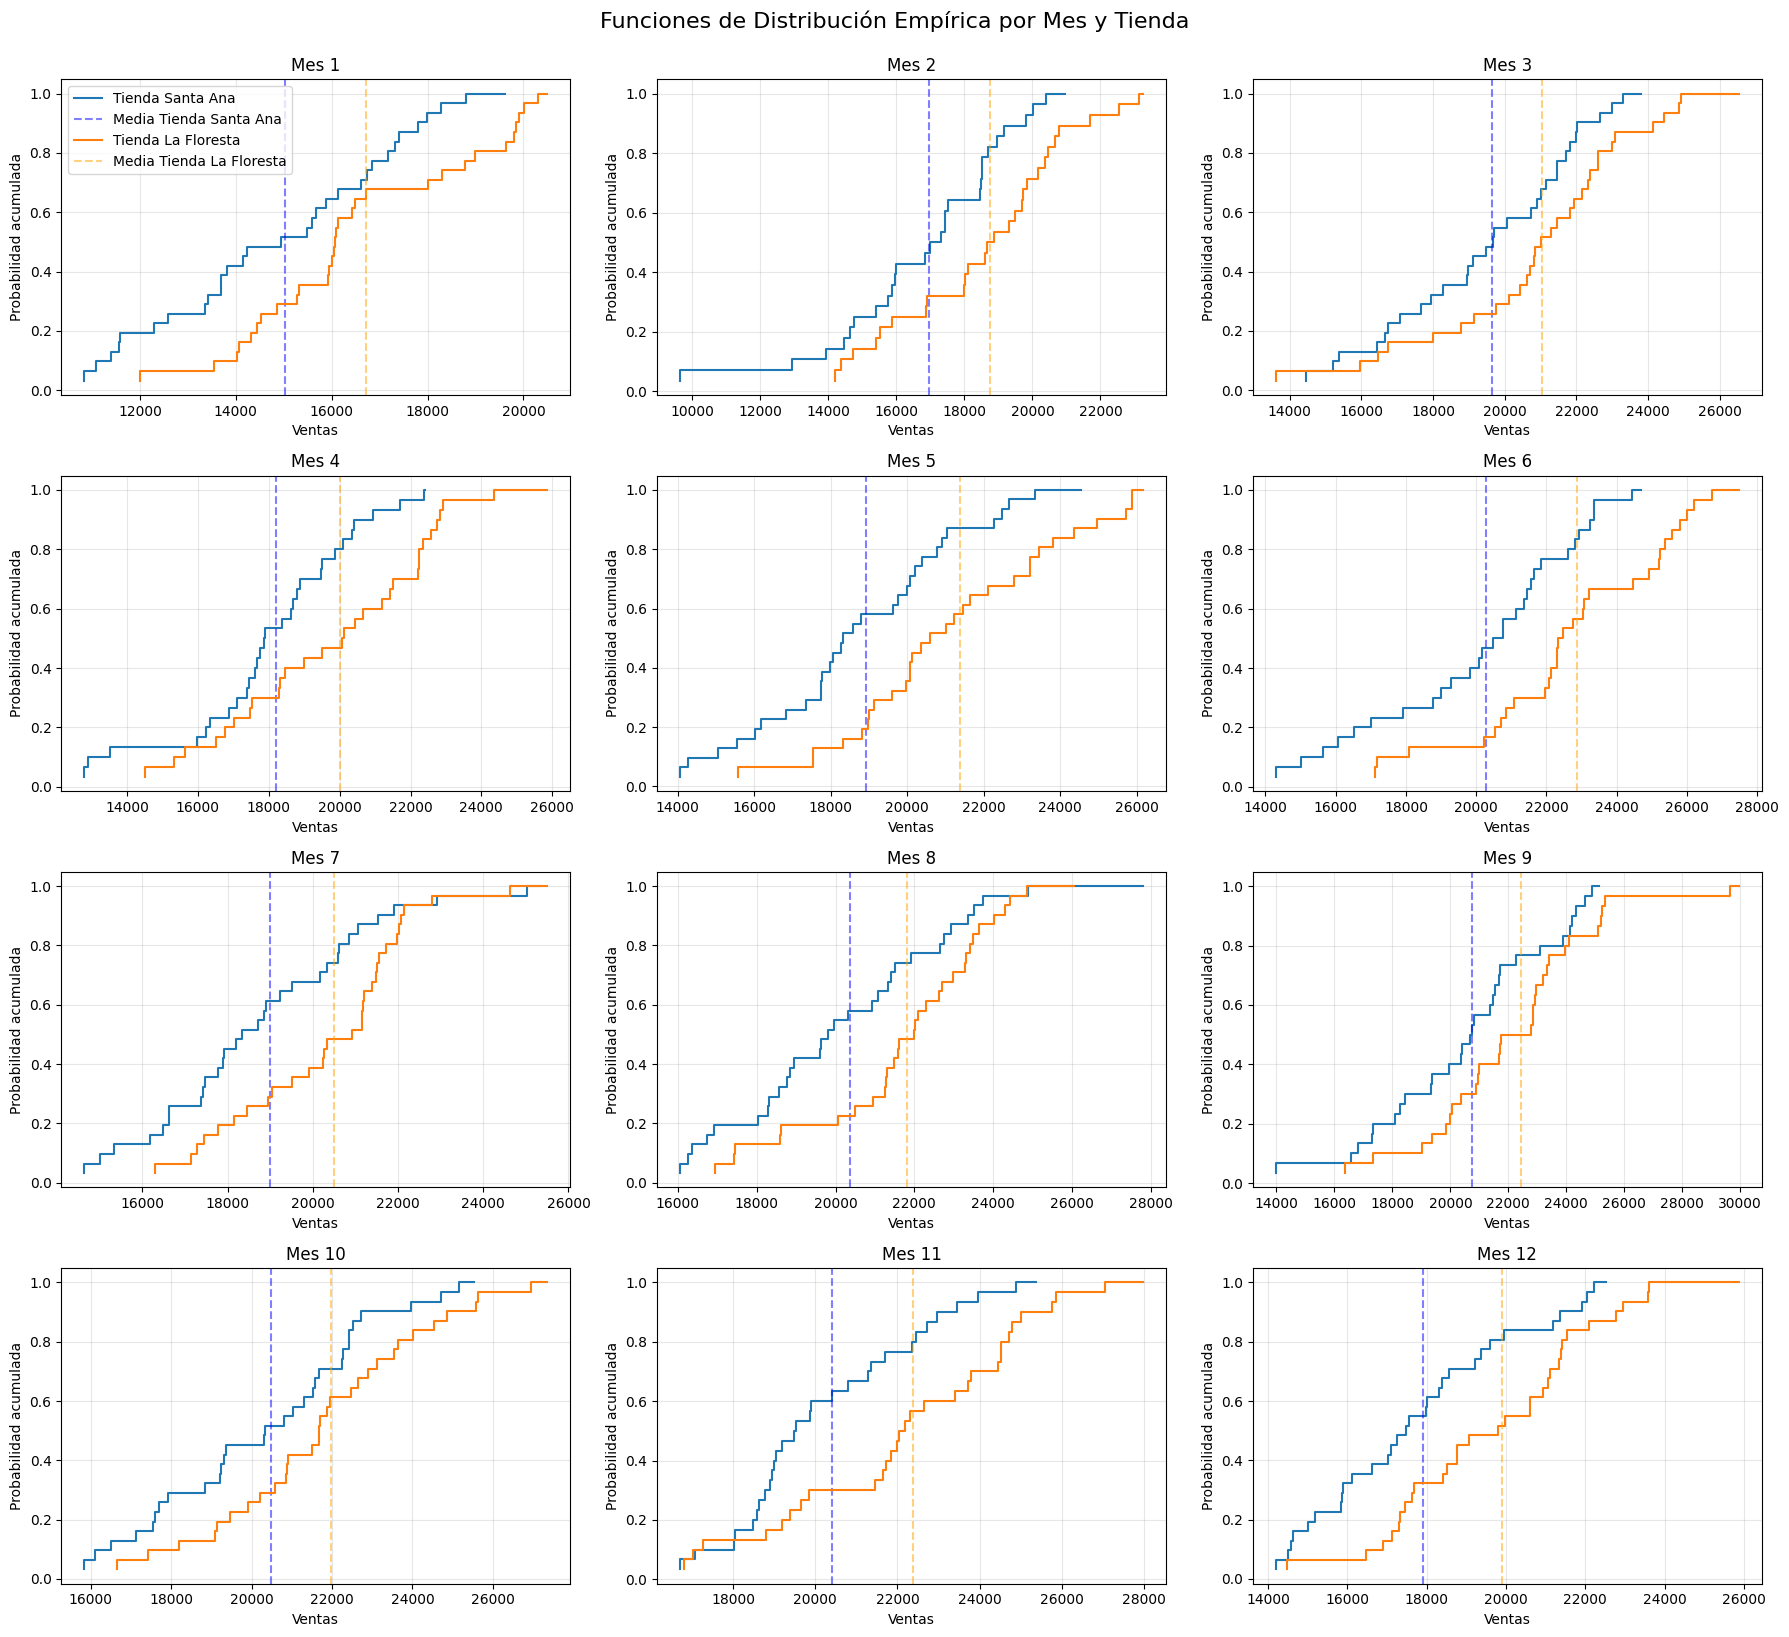

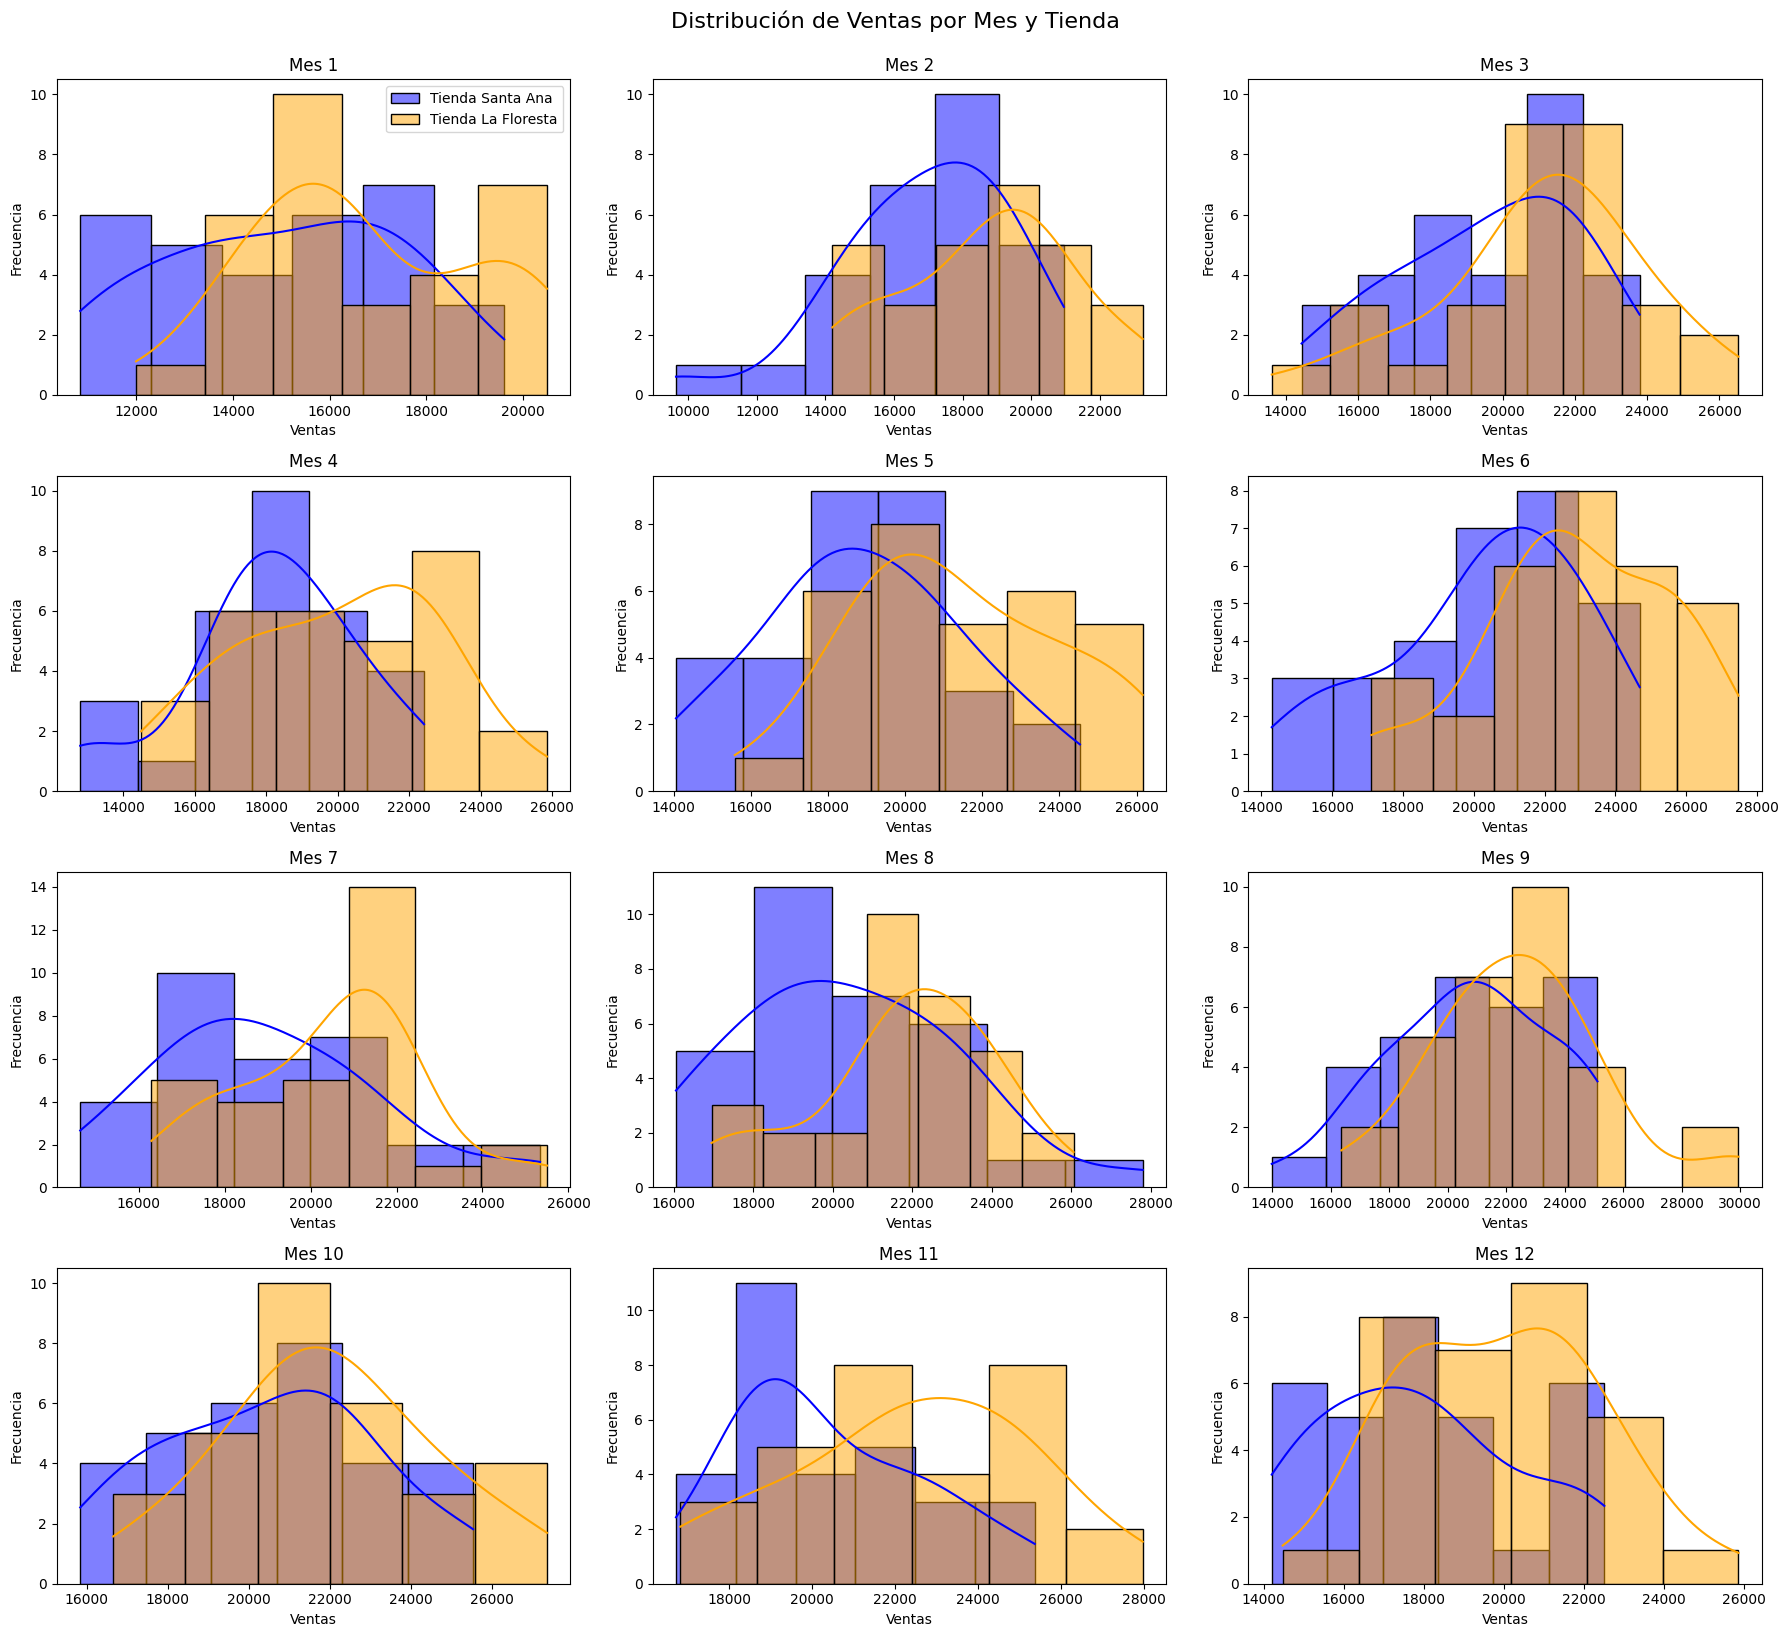

In [6]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns

import matplotlib.pyplot as plt

# Extract month from Fecha
df['Mes'] = df['Fecha'].dt.month

colors = ['blue', 'orange']

# Create a function to plot empirical distribution for each month by store
def plot_monthly_empirical_distributions():
    # Set up the figure with subplots
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.flatten()
    
    # Loop through each month
    for month in range(1, 13):
        ax = axes[month-1]
        
        # Filter data for current month
        month_data = df[df['Mes'] == month]
        
        # Create ECDFs for each store
        for idx, store in enumerate(['Santa Ana', 'La Floresta']):
            store_data = month_data[month_data['sheet_id'] == store]['Ventas']
            
            if len(store_data) > 0:
                # Create empirical CDF
                ecdf = ECDF(store_data)
                
                # Plot the ECDF
                ax.step(ecdf.x, ecdf.y, label=f'Tienda {store}')
                
                # Add some statistics
                ax.axvline(store_data.mean(), color=colors[idx], linestyle='--', 
                          alpha=0.5, label=f'Media Tienda {store}')
        
        # Set labels and title
        ax.set_title(f'Mes {month}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('Probabilidad acumulada')
        ax.grid(True, alpha=0.3)
        
        if month == 1:  # Only add legend to first plot to avoid repetition
            ax.legend()
    
    plt.tight_layout()
    plt.suptitle('Funciones de Distribución Empírica por Mes y Tienda', y=1.02, fontsize=16)
    return fig

# Execute the function to plot the distributions
fig = plot_monthly_empirical_distributions()

# Let's also create histograms to better visualize the actual distributions
def plot_monthly_histograms():
    fig, axes = plt.subplots(4, 3, figsize=(18, 16))
    axes = axes.flatten()
    
    for month in range(1, 13):
        ax = axes[month-1]
        month_data = df[df['Mes'] == month]
        
        # Plot histograms for each store
        for store, color in zip(['Santa Ana', 'La Floresta'], ['blue', 'orange']):
            store_data = month_data[month_data['sheet_id'] == store]['Ventas']
            if len(store_data) > 0:
                sns.histplot(store_data, kde=True, label=f'Tienda {store}', 
                            alpha=0.5, color=color, ax=ax)
        
        ax.set_title(f'Mes {month}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('Frecuencia')
        
        if month == 1:
            ax.legend()
    
    plt.tight_layout()
    plt.suptitle('Distribución de Ventas por Mes y Tienda', y=1.02, fontsize=16)
    return fig

# Execute the histogram function
hist_fig = plot_monthly_histograms()

Dataframe resultante: La Floresta


,Mes,Media,t 95% Width,t 99% Width
0,1,16718.606761,1710.667785,2303.477658
1,2,18759.641280,1981.896245,2676.247432
2,3,21044.761416,2083.735966,2805.827809
3,4,19999.408682,2129.452152,2869.893812
4,5,21371.885082,2032.100960,2736.299356
5,6,22880.557577,2025.608518,2729.942228
6,7,20489.433974,1562.262954,2103.645045
7,8,21825.261259,1645.242526,2215.380119
8,9,22436.002860,2245.612999,3026.445484
9,10,21962.283394,1923.690638,2590.320834


Dataframe resultante: Santa Ana


,Mes,Media,t 95% Width,t 99% Width
0,1,15030.475882,1820.924333,2451.942191
1,2,16958.625868,1944.895378,2626.283425
2,3,19634.914851,1864.557519,2510.695896
3,4,18194.133738,1819.116725,2451.650218
4,5,18922.056113,1937.094705,2608.369909
5,6,20266.017909,2111.089135,2845.145705
6,7,18996.791587,1937.390559,2608.768287
7,8,20361.490018,2041.329391,2748.725782
8,9,20755.718938,2122.728029,2860.831613
9,10,20478.160075,1950.507146,2626.430257


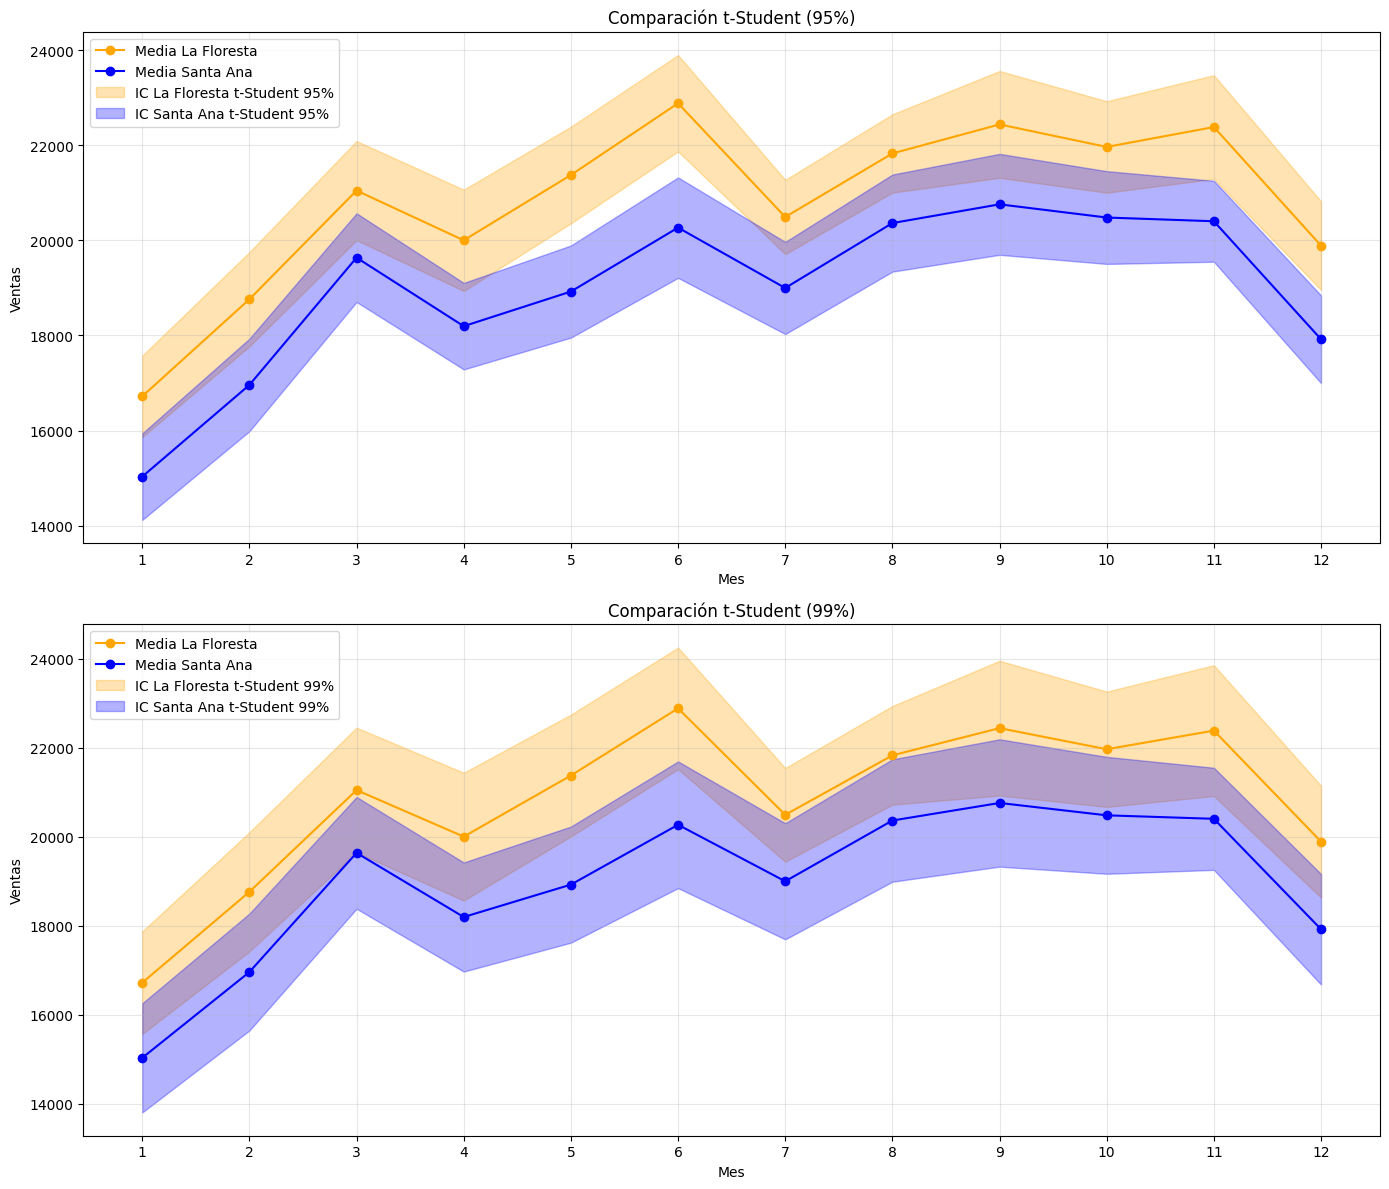

In [25]:
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt

# Define function to calculate t-distribution confidence intervals
def calculate_t_confidence_intervals(data, confidence_levels=[0.95, 0.99]):
    results = {}
    n = len(data)
    mean = np.mean(data)
    std_error = np.std(data, ddof=1) / np.sqrt(n)
    
    for level in confidence_levels:
        # Calculate critical t-value (two-tailed)
        t_critical = stats.t.ppf((1 + level) / 2, df=n-1)
        
        # Calculate confidence interval
        margin_of_error = t_critical * std_error
        lower_bound = mean - margin_of_error
        upper_bound = mean + margin_of_error
        
        results[f"{level*100:.0f}%"] = (mean, lower_bound, upper_bound, t_critical)
    
    return results

confidence_levels = [0.95, 0.99]

def calculate_confidence_intervals(store):
    # Calculate t-distribution confidence intervals for each month for La Floresta
    t_intervals_by_month = {}
    for month in range(1, 13):
        # Filter data for current month and store
        store_data = df[(df['Mes'] == month) & (df['sheet_id'] == store)]['Ventas']
        
        # Calculate t-distribution confidence intervals
        t_intervals = calculate_t_confidence_intervals(store_data)
        t_intervals_by_month[month] = t_intervals

    # Prepare data for plotting
    months = list(range(1, 13))
    t_ci_95_lower = [t_intervals_by_month[m]['95%'][1] for m in months]
    t_ci_95_upper = [t_intervals_by_month[m]['95%'][2] for m in months]
    t_ci_99_lower = [t_intervals_by_month[m]['99%'][1] for m in months]
    t_ci_99_upper = [t_intervals_by_month[m]['99%'][2] for m in months]
    means = [t_intervals_by_month[m]['95%'][0] for m in months]


    # Create a dataframe to compare empirical and t-distribution confidence intervals
    comparison_df = pd.DataFrame({
        'Mes': months,
        'Media': means,
        't 95% Lower': t_ci_95_lower,
        't 95% Upper': t_ci_95_upper,
        't 99% Lower': t_ci_99_lower,
        't 99% Upper': t_ci_99_upper
    })

    # Calculate width of intervals
    comparison_df['t 95% Width'] = comparison_df['t 95% Upper'] - comparison_df['t 95% Lower']
    comparison_df['t 99% Width'] = comparison_df['t 99% Upper'] - comparison_df['t 99% Lower']

    # Display the comparison
    print(f"Dataframe resultante: {store}")
    display(comparison_df[['Mes', 'Media', 't 95% Width', 't 99% Width']])

    return comparison_df

flo_comp = calculate_confidence_intervals('La Floresta')
st_ana_comp = calculate_confidence_intervals('Santa Ana')


# Create a visualization comparing empirical and t-distribution confidence intervals
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

for i, level in enumerate(['95%', '99%']):
    ax = axes[i]
    
    # Plot the mean
    ax.plot(flo_comp["Mes"], flo_comp["Media"], 'o-', color='orange', label='Media La Floresta')
    ax.plot(st_ana_comp["Mes"], st_ana_comp["Media"], 'o-', color='blue', label='Media Santa Ana')
    
    if level == '95%':
        # Plot t-distribution confidence intervals
        ax.fill_between(
            flo_comp["Mes"], 
            flo_comp['t 95% Lower'],
            flo_comp['t 95% Upper'],
            alpha=0.3, 
            color='orange',
            label=f'IC La Floresta t-Student {level}'
        )
        ax.fill_between(
            st_ana_comp["Mes"], 
            st_ana_comp['t 95% Lower'],
            st_ana_comp['t 95% Upper'],
            alpha=0.3, 
            color='blue',
            label=f'IC Santa Ana t-Student {level}'
        )
    else:
        # Plot t-distribution confidence intervals
        ax.fill_between(
            flo_comp["Mes"], 
            flo_comp['t 99% Lower'],
            flo_comp['t 99% Upper'],
            alpha=0.3, 
            color='orange',
            label=f'IC La Floresta t-Student {level}'
        )

        ax.fill_between(
            st_ana_comp["Mes"], 
            st_ana_comp['t 99% Lower'],
            st_ana_comp['t 99% Upper'],
            alpha=0.3, 
            color='blue',
            label=f'IC Santa Ana t-Student {level}'
        )
    
    ax.set_title(f'Comparación t-Student ({level})')
    ax.set_xlabel('Mes')
    ax.set_ylabel('Ventas')
    ax.set_xticks(range(1, 13))
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

# Ejercicio 2

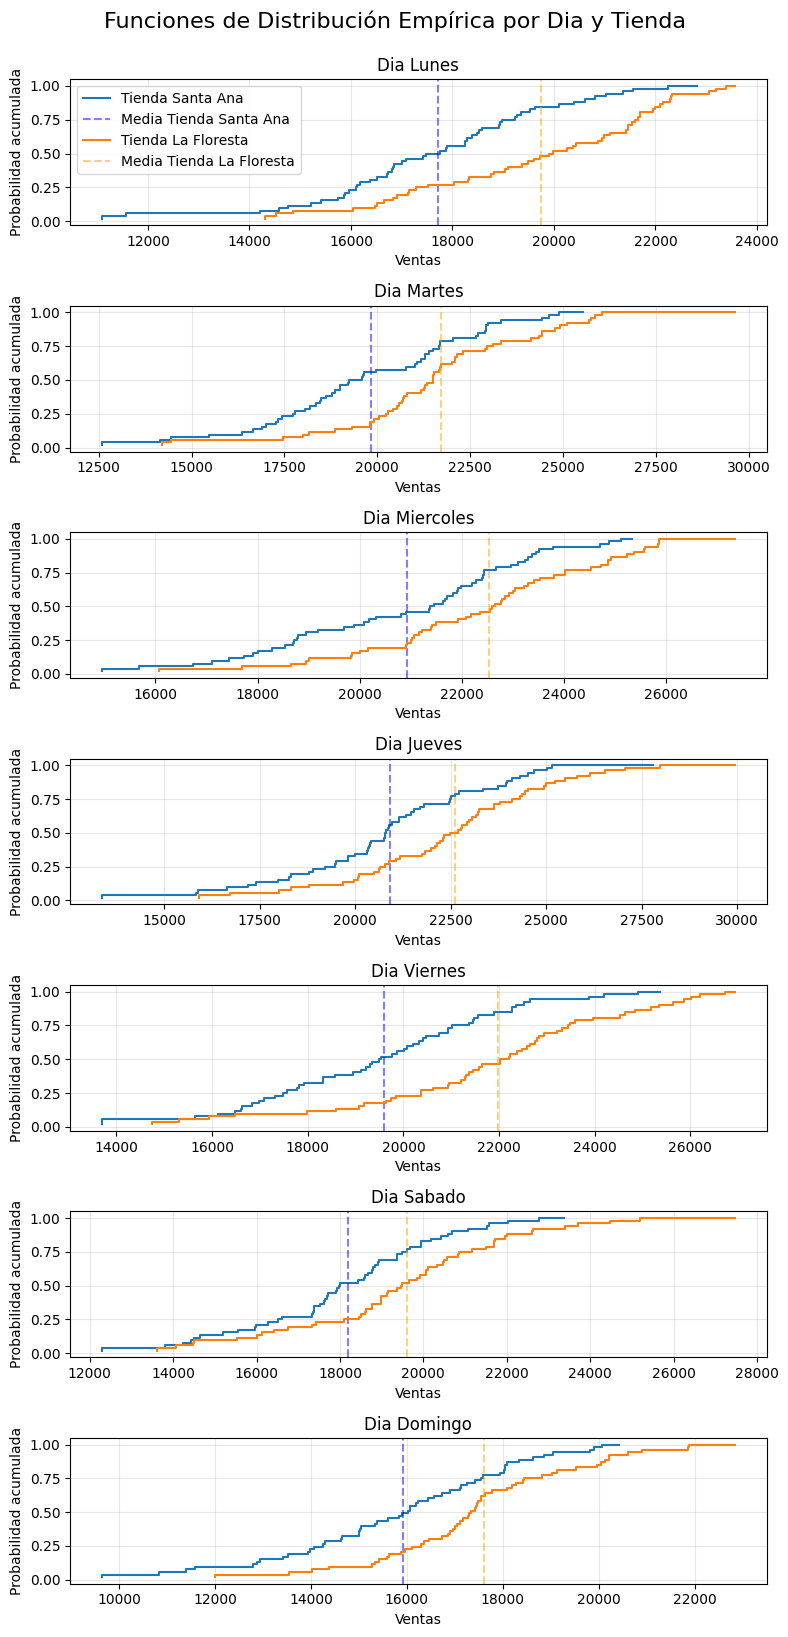

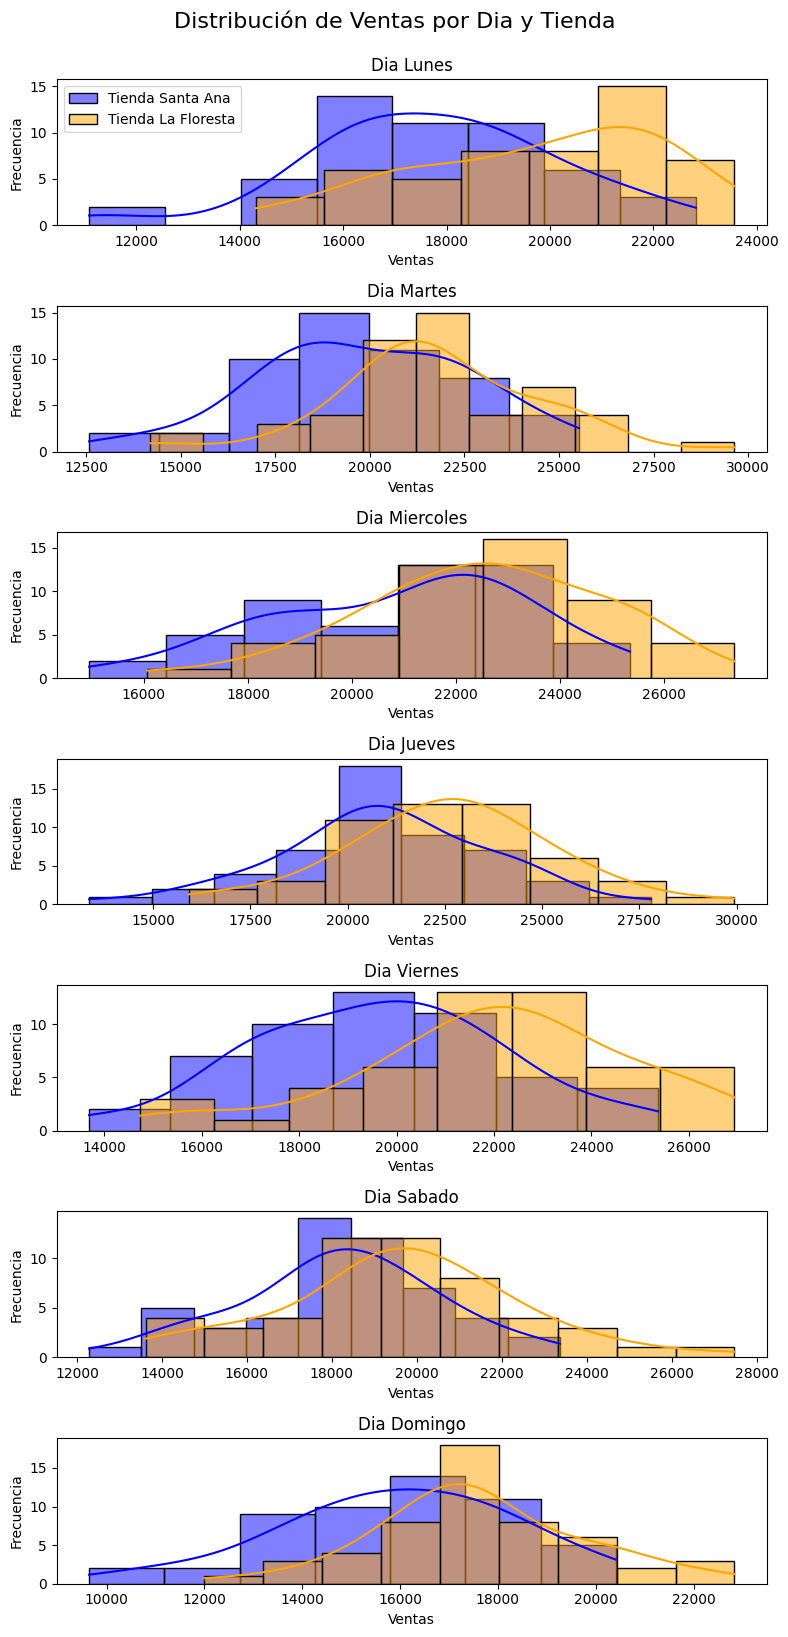

In [21]:
nombres_dias = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
# Create a function to plot empirical distribution for each month by store
def plot_daily_empirical_distributions():
    # Set up the figure with subplots
    fig, axes = plt.subplots(7, 1, figsize=(8, 16))
    axes = axes.flatten()
    
    # Loop through each month
    for day in range(7):
        ax = axes[day]
        
        # Filter data for current month
        day_data = df[df['DiaSemana'] == day]
        
        # Create ECDFs for each store
        for idx, store in enumerate(['Santa Ana', 'La Floresta']):
            store_data = day_data[day_data['sheet_id'] == store]['Ventas']
            
            if len(store_data) > 0:
                # Create empirical CDF
                ecdf = ECDF(store_data)
                
                # Plot the ECDF
                ax.step(ecdf.x, ecdf.y, label=f'Tienda {store}')
                
                # Add some statistics
                ax.axvline(store_data.mean(), color=colors[idx], linestyle='--', 
                          alpha=0.5, label=f'Media Tienda {store}')
        
        # Set labels and title
        ax.set_title(f'Dia {nombres_dias[day]}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('Probabilidad acumulada')
        ax.grid(True, alpha=0.3)
        
        if day == 0:  # Only add legend to first plot to avoid repetition
            ax.legend()
    
    plt.tight_layout()
    plt.suptitle('Funciones de Distribución Empírica por Dia y Tienda', y=1.02, fontsize=16)
    return fig

# Execute the function to plot the distributions
fig = plot_daily_empirical_distributions()

# Let's also create histograms to better visualize the actual distributions
def plot_daily_histograms():
    fig, axes = plt.subplots(7, 1, figsize=(8, 16))
    axes = axes.flatten()
    
    for day in range(7):
        ax = axes[day]
        day_data = df[df['DiaSemana'] == day]
        
        # Plot histograms for each store
        for store, color in zip(['Santa Ana', 'La Floresta'], ['blue', 'orange']):
            store_data = day_data[day_data['sheet_id'] == store]['Ventas']
            if len(store_data) > 0:
                sns.histplot(store_data, kde=True, label=f'Tienda {store}', 
                            alpha=0.5, color=color, ax=ax)
        
        ax.set_title(f'Dia {nombres_dias[day]}')
        ax.set_xlabel('Ventas')
        ax.set_ylabel('Frecuencia')
        
        if day == 0:
            ax.legend()
    
    plt.tight_layout()
    plt.suptitle('Distribución de Ventas por Dia y Tienda', y=1.02, fontsize=16)
    return fig

# Execute the histogram function
hist_fig = plot_daily_histograms()

Dataframe resultante: La Floresta


,DiaSemana,NombreDia,Media,95% Width,99% Width
0,0,Lunes,19739.588813,1355.456599,1806.562402
1,1,Martes,21718.238609,1545.958521,2060.464749
2,2,Miércoles,22526.375895,1298.889000,1731.168695
3,3,Jueves,22617.024598,1509.839804,2012.325460
4,4,Viernes,21969.097645,1569.753532,2092.178911
5,5,Sábado,19616.015897,1564.206044,2084.785180
6,6,Domingo,17598.884503,1179.277075,1571.314277


Dataframe resultante: Santa Ana


,DiaSemana,NombreDia,Media,95% Width,99% Width
0,0,Lunes,17719.756594,1333.697114,1777.561202
1,1,Martes,19823.192936,1590.252971,2119.500713
2,2,Miércoles,20918.719345,1381.612299,1841.422910
3,3,Jueves,20910.548779,1511.038896,2013.923618
4,4,Viernes,19589.350260,1445.713458,1926.857400
5,5,Sábado,18183.378757,1306.942465,1741.902412
6,6,Domingo,15913.011329,1335.428416,1779.376350


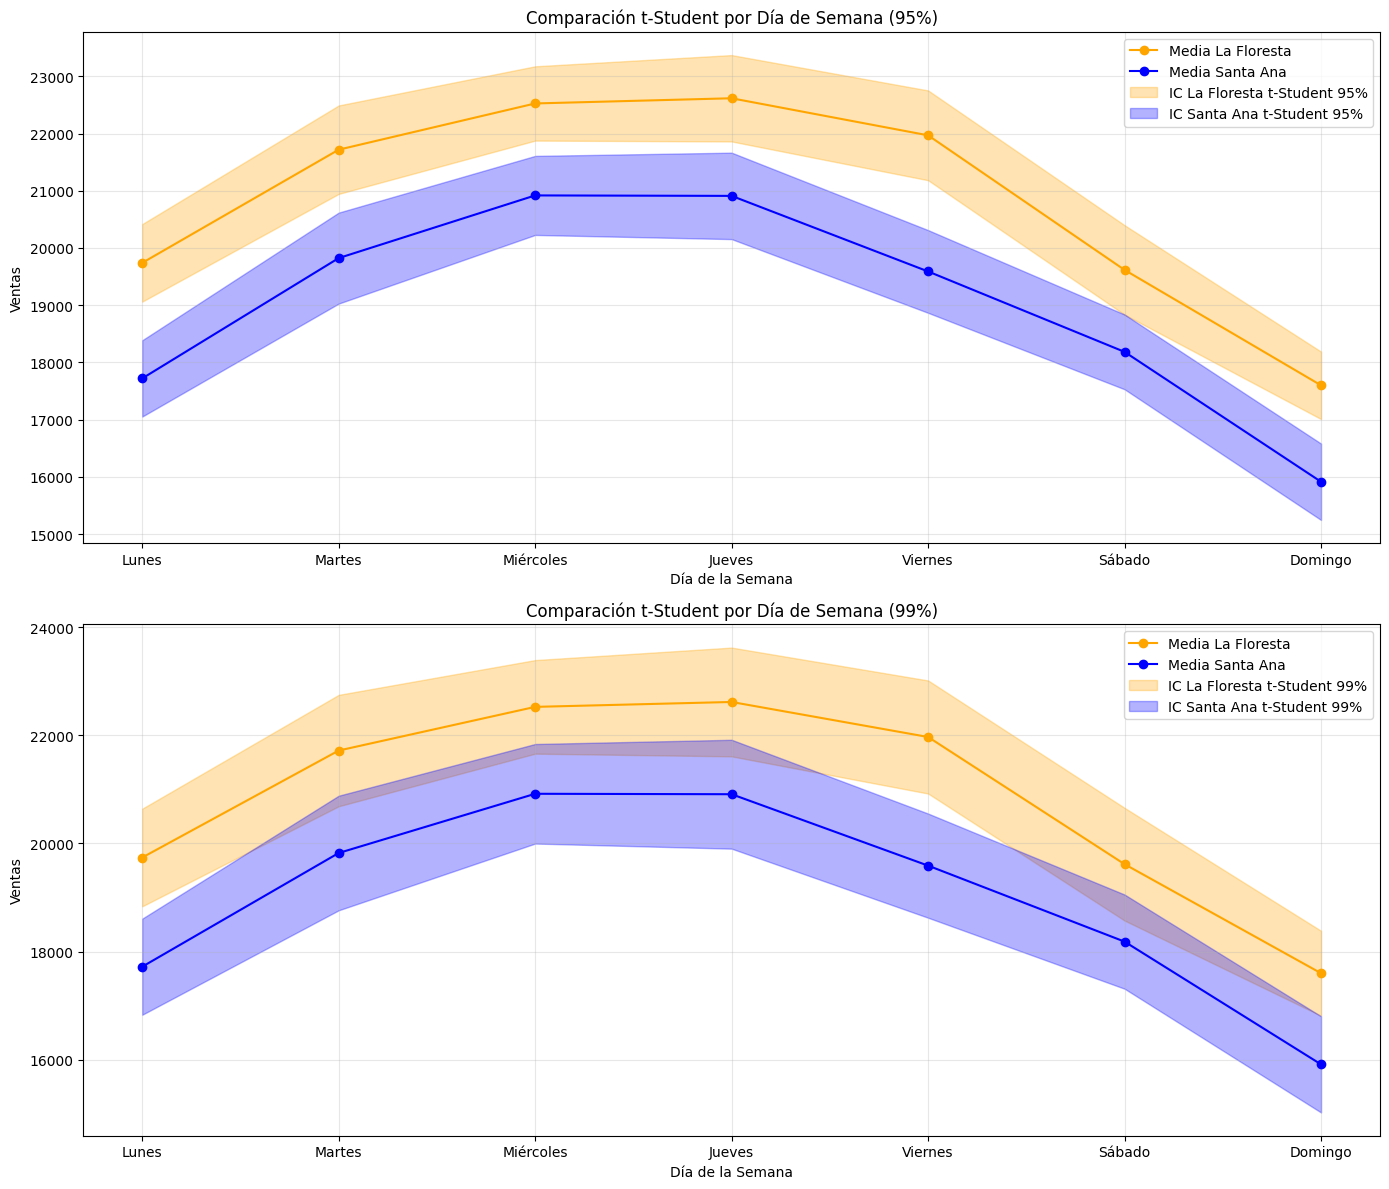

In [24]:
# Add day of week to the dataframe
df['DiaSemana'] = df['Fecha'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Function to calculate confidence intervals by day of week for a specific store
def calculate_dow_confidence_intervals(store):
    # Calculate t-distribution confidence intervals for each day of week
    t_intervals_by_dow = {}
    for day in range(7):
        # Filter data for current day and store
        store_data = df[(df['DiaSemana'] == day) & (df['sheet_id'] == store)]['Ventas']
        
        # Calculate t-distribution confidence intervals
        if len(store_data) > 1:  # Need at least 2 data points for t-distribution
            t_intervals = calculate_t_confidence_intervals(store_data)
            t_intervals_by_dow[day] = t_intervals
    
    # Prepare data for DataFrame
    days = list(range(7))
    means = []
    t_ci_95_lower = []
    t_ci_95_upper = []
    t_ci_99_lower = []
    t_ci_99_upper = []
    t_95_width = []
    t_99_width = []
    
    for day in days:
        if day in t_intervals_by_dow:
            means.append(t_intervals_by_dow[day]['95%'][0])
            t_ci_95_lower.append(t_intervals_by_dow[day]['95%'][1])
            t_ci_95_upper.append(t_intervals_by_dow[day]['95%'][2])
            t_ci_99_lower.append(t_intervals_by_dow[day]['99%'][1])
            t_ci_99_upper.append(t_intervals_by_dow[day]['99%'][2])
            t_95_width.append(t_intervals_by_dow[day]['95%'][2] - t_intervals_by_dow[day]['95%'][1])
            t_99_width.append(t_intervals_by_dow[day]['99%'][2] - t_intervals_by_dow[day]['99%'][1])
    
    # Create a dataframe to compare confidence intervals
    dow_df = pd.DataFrame({
        'DiaSemana': days,
        'NombreDia': ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
        'Media': means,
        '95% Lower': t_ci_95_lower,
        '95% Upper': t_ci_95_upper,
        '99% Lower': t_ci_99_lower,
        '99% Upper': t_ci_99_upper,
        '95% Width': t_95_width,
        '99% Width': t_99_width
    })
    
    # Display the table
    print(f"Dataframe resultante: {store}")
    display(dow_df[['DiaSemana', 'NombreDia', 'Media', '95% Width', '99% Width']])
    
    return dow_df

# Calculate confidence intervals for both stores
flo_dow_ci = calculate_dow_confidence_intervals('La Floresta')
sa_dow_ci = calculate_dow_confidence_intervals('Santa Ana')

# Create a visualization comparing t-distribution confidence intervals by day of week
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

for i, level in enumerate(['95%', '99%']):
    ax = axes[i]
    
    # Plot the mean
    ax.plot(flo_dow_ci["NombreDia"], flo_dow_ci["Media"], 'o-', color='orange', label='Media La Floresta')
    ax.plot(sa_dow_ci["NombreDia"], sa_dow_ci["Media"], 'o-', color='blue', label='Media Santa Ana')
    
    if level == '95%':
        # Plot t-distribution confidence intervals
        ax.fill_between(
            flo_dow_ci["NombreDia"], 
            flo_dow_ci['95% Lower'],
            flo_dow_ci['95% Upper'],
            alpha=0.3, 
            color='orange',
            label=f'IC La Floresta t-Student {level}'
        )
        ax.fill_between(
            sa_dow_ci["NombreDia"], 
            sa_dow_ci['95% Lower'],
            sa_dow_ci['95% Upper'],
            alpha=0.3, 
            color='blue',
            label=f'IC Santa Ana t-Student {level}'
        )
    else:
        # Plot t-distribution confidence intervals
        ax.fill_between(
            flo_dow_ci["NombreDia"], 
            flo_dow_ci['99% Lower'],
            flo_dow_ci['99% Upper'],
            alpha=0.3, 
            color='orange',
            label=f'IC La Floresta t-Student {level}'
        )
        ax.fill_between(
            sa_dow_ci["NombreDia"], 
            sa_dow_ci['99% Lower'],
            sa_dow_ci['99% Upper'],
            alpha=0.3, 
            color='blue',
            label=f'IC Santa Ana t-Student {level}'
        )
    
    ax.set_title(f'Comparación t-Student por Día de Semana ({level})')
    ax.set_xlabel('Día de la Semana')
    ax.set_ylabel('Ventas')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()

Prueba de hipótesis: La Floresta vende menos que Santa Ana
------------------------------------------------------------
Media La Floresta: 20817.62
Media Santa Ana: 18999.80
Diferencia: 1817.82
------------------------------------------------------------


,Estadístico t,p-valor,Significativo al 95%,Significativo al 99%
0,7.978245,1.0,False,False


C:\Users\rodri\AppData\Local\Temp\ipykernel_22848\68109650.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([santa_ana_data, floresta_data], labels=['Santa Ana', 'La Floresta'])


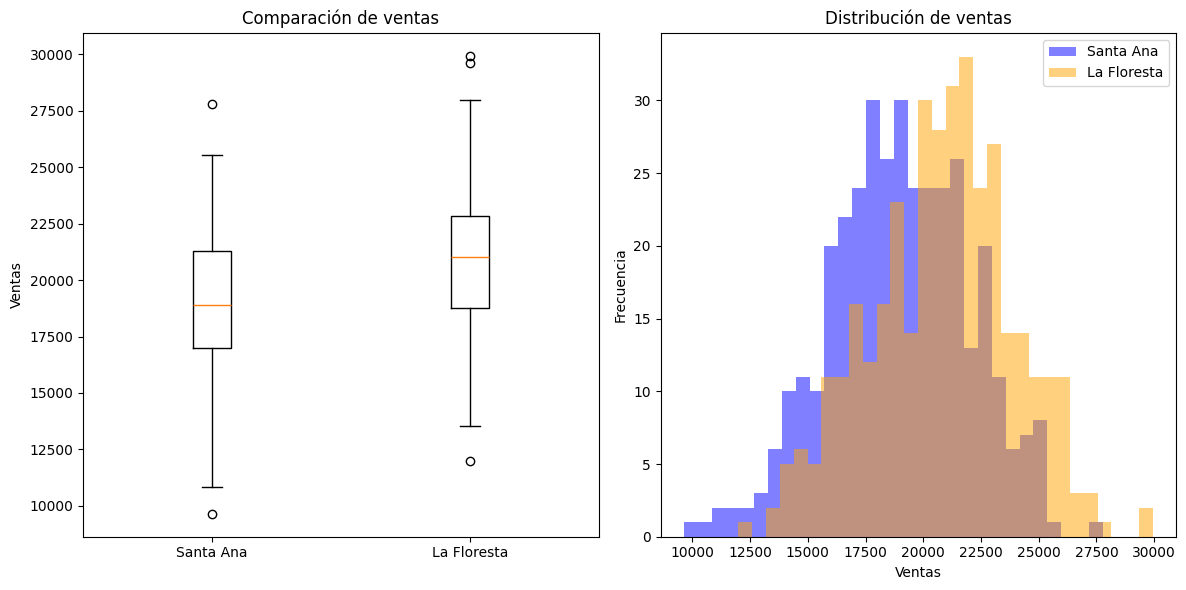

,Mes,Media La Floresta,Media Santa Ana,Diferencia,Estadístico t,p-valor,Significativo al 95%,Significativo al 99%
0,1,16718.606761,15030.475882,1688.130880,2.759832,0.996167,False,False
1,2,18759.641280,16958.625868,1801.015412,2.661624,0.994889,False,False
2,3,21044.761416,19634.914851,1409.846565,2.059458,0.978074,False,False
3,4,19999.408682,18194.133738,1805.274944,2.636656,0.994606,False,False
4,5,21371.885082,18922.056113,2449.828969,3.564245,0.999638,False,False
5,6,22880.557577,20266.017909,2614.539667,3.655408,0.999722,False,False
6,7,20489.433974,18996.791587,1492.642388,2.449676,0.991315,False,False
7,8,21825.261259,20361.490018,1463.771241,2.280431,0.986843,False,False
8,9,22436.002860,20755.718938,1680.283923,2.224239,0.984974,False,False
9,10,21962.283394,20478.160075,1484.123319,2.212771,0.984635,False,False


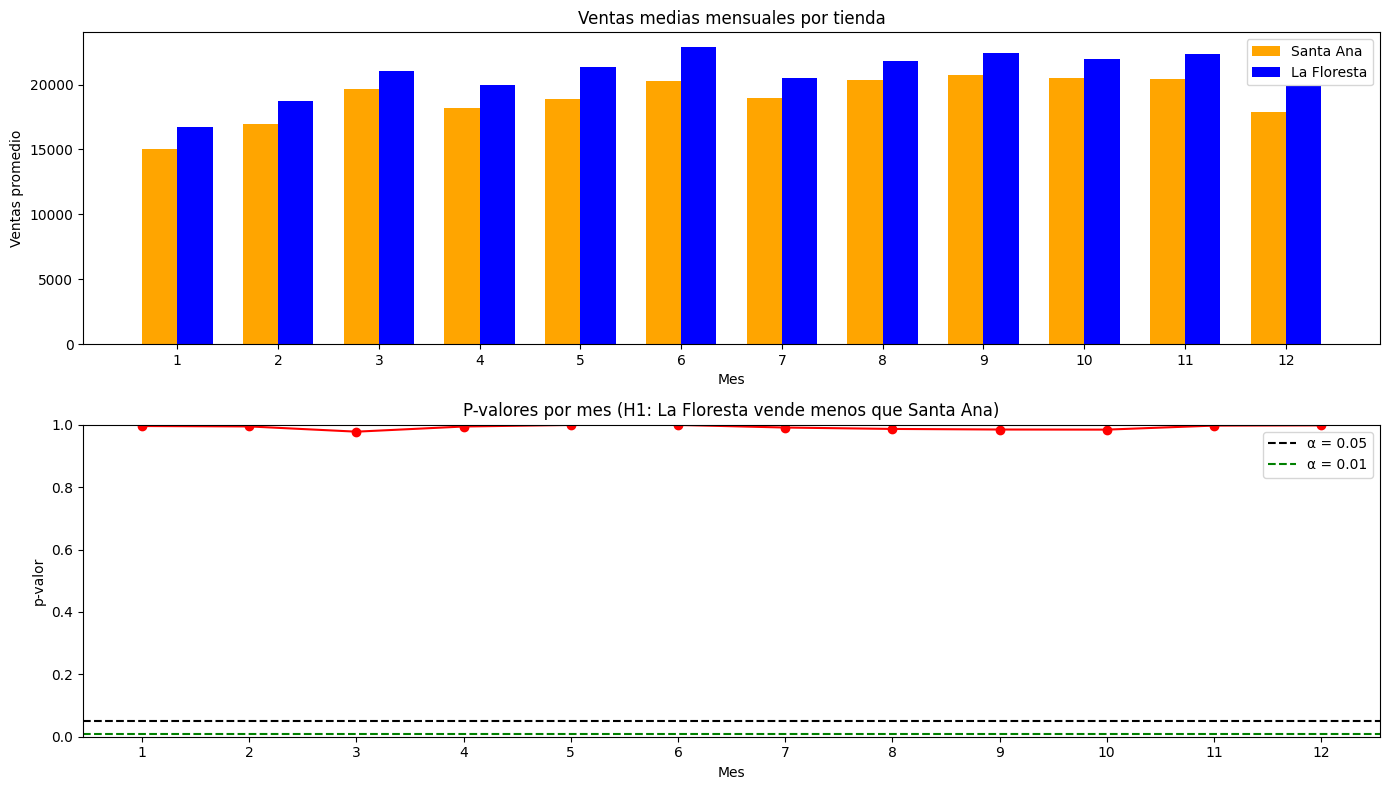

In [29]:
import pandas as pd
import numpy as np

# Realizar prueba de hipótesis para comparar las ventas de ambas tiendas
# Hipótesis nula (H0): No hay diferencia entre las ventas medias de ambas tiendas
# Hipótesis alternativa (H1): La Floresta vende menos que Santa Ana

import scipy.stats as stats
import matplotlib.pyplot as plt

# Separar los datos de cada tienda
floresta_data = df[df['sheet_id'] == 'La Floresta']['Ventas']
santa_ana_data = df[df['sheet_id'] == 'Santa Ana']['Ventas']

# Realizar prueba t para muestras independientes (one-sided)
# Usamos equal_var=False para una prueba de Welch t-test (no asumimos varianzas iguales)
t_stat, p_value = stats.ttest_ind(floresta_data, santa_ana_data, equal_var=False, alternative='less')

# Crear tabla de resultados
results = pd.DataFrame({
    'Estadístico t': [t_stat],
    'p-valor': [p_value],
    'Significativo al 95%': [p_value < 0.05],
    'Significativo al 99%': [p_value < 0.01]
})

# Mostrar resultados
print("Prueba de hipótesis: La Floresta vende menos que Santa Ana")
print("------------------------------------------------------------")
print(f"Media La Floresta: {floresta_data.mean():.2f}")
print(f"Media Santa Ana: {santa_ana_data.mean():.2f}")
print(f"Diferencia: {floresta_data.mean() - santa_ana_data.mean():.2f}")
print("------------------------------------------------------------")
display(results)

# Visualización
plt.figure(figsize=(12, 6))

# Boxplot para comparar distribuciones
plt.subplot(1, 2, 1)
plt.boxplot([santa_ana_data, floresta_data], labels=['Santa Ana', 'La Floresta'])
plt.title('Comparación de ventas')
plt.ylabel('Ventas')

# Histogramas superpuestos
plt.subplot(1, 2, 2)
plt.hist(santa_ana_data, alpha=0.5, label='Santa Ana', bins=30, color='blue')
plt.hist(floresta_data, alpha=0.5, label='La Floresta', bins=30, color='orange')
plt.title('Distribución de ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

# Realizar pruebas por mes
monthly_results = []
for month in range(1, 13):
    floresta_month = df[(df['sheet_id'] == 'La Floresta') & (df['Mes'] == month)]['Ventas']
    santa_ana_month = df[(df['sheet_id'] == 'Santa Ana') & (df['Mes'] == month)]['Ventas']
    
    t_stat_month, p_val_month = stats.ttest_ind(floresta_month, santa_ana_month, equal_var=False, alternative='less')
    
    monthly_results.append({
        'Mes': month,
        'Media La Floresta': floresta_month.mean(),
        'Media Santa Ana': santa_ana_month.mean(),
        'Diferencia': floresta_month.mean() - santa_ana_month.mean(),
        'Estadístico t': t_stat_month,
        'p-valor': p_val_month,
        'Significativo al 95%': p_val_month < 0.05,
        'Significativo al 99%': p_val_month < 0.01
    })

# Mostrar resultados mensuales
monthly_df = pd.DataFrame(monthly_results)
display(monthly_df)

# Visualización de resultados mensuales
plt.figure(figsize=(14, 8))

# Gráfico de barras para comparar medias mensuales
plt.subplot(2, 1, 1)
bar_width = 0.35
months = range(1, 13)
plt.bar(np.array(months) - bar_width/2, monthly_df['Media Santa Ana'], width=bar_width, label='Santa Ana', color='orange')
plt.bar(np.array(months) + bar_width/2, monthly_df['Media La Floresta'], width=bar_width, label='La Floresta', color='blue')
plt.title('Ventas medias mensuales por tienda')
plt.xlabel('Mes')
plt.ylabel('Ventas promedio')
plt.xticks(months)
plt.legend()

# Gráfico de p-valores mensuales
plt.subplot(2, 1, 2)
plt.plot(months, monthly_df['p-valor'], 'o-', color='red')
plt.axhline(y=0.05, linestyle='--', color='black', label='α = 0.05')
plt.axhline(y=0.01, linestyle='--', color='green', label='α = 0.01')
plt.title('P-valores por mes (H1: La Floresta vende menos que Santa Ana)')
plt.xlabel('Mes')
plt.ylabel('p-valor')
plt.xticks(months)
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
# Realizar prueba t para muestras independientes (one-sided)
# Usamos equal_var=False para una prueba de Welch t-test (no asumimos varianzas iguales)
t_stat, p_value = stats.ttest_ind(floresta_data, santa_ana_data, equal_var=False, alternative='greater')

# Crear tabla de resultados
results = pd.DataFrame({
    'Estadístico t': [t_stat],
    'p-valor': [p_value],
    'Significativo al 95%': [p_value < 0.05],
    'Significativo al 99%': [p_value < 0.01]
})

# Mostrar resultados
print("Prueba de hipótesis: La Floresta vende mas que Santa Ana")
print("------------------------------------------------------------")
print(f"Media La Floresta: {floresta_data.mean():.2f}")
print(f"Media Santa Ana: {santa_ana_data.mean():.2f}")
print(f"Diferencia: {floresta_data.mean() - santa_ana_data.mean():.2f}")
print("------------------------------------------------------------")
display(results)


Prueba de hipótesis: La Floresta vende mas que Santa Ana
------------------------------------------------------------
Media La Floresta: 20817.62
Media Santa Ana: 18999.80
Diferencia: 1817.82
------------------------------------------------------------


,Estadístico t,p-valor,Significativo al 95%,Significativo al 99%
0,7.978245,2.883530e-15,True,True
